<a href="https://colab.research.google.com/github/Baldros/Neural-Networks/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

O objetivo desse notebook é estudar um pouco sobre **Data Augmentation**, uma técnica amplamente utilizada, especialmente em visão computacional, para aumentar a quantidade e a diversidade de dados de treinamento sem a necessidade de coletar novos exemplos.

## Data Augmentation:
A técnica consiste em aplicar transformações controladas nos dados existentes, cuja o objetivo é melhorar a capacidade do modelo de generalizar para novos dados, reduzindo o overfitting e aumentando sua robustez em cenários variados. Essa abordagem é especialmente valiosa quando os conjuntos de dados são pequenos ou quando a coleta de dados adicionais é custosa ou inviável.

In [1]:
# Bibliotecas Utilizadas:
from torchvision.datasets import ImageFolder,FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [7]:
# Instanciando pipeline de transformação dos dados:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128))
])

O `transforms.Compose` é uma implementação _pipeline_ para transformações. Aqui, se é possível realizar uma gama de transformações que se queria utilizar no conjunto de dados.

In [3]:
# Acessando os dados:
try:
  dataset_train = ImageFolder( # Busca os dados localmente
      input("data path: "),
      transform=train_transforms # Realizando transformação:
  )
except:
  dataset_train = FashionMNIST( # Alternativa, caso não se tenha dados localmente
    root="data",
    train=True,
    download=True,
    transform=train_transforms # Realizando transformação:
    )

data path: 


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.44MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.6MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
# Instanciando conjunto de dados:
dataloader_train = DataLoader(
    dataset_train,
    shuffle=True,
    batch_size=1,
)

A classe `DataLoader` é um _pipeline_ voltado para a preparação dos dados para a construção do modelo. É muito utilizada quando se formula modelos no pytorch e ajuda bastante quando temos um conjunto de dados complexo.

In [11]:
image, label = next(iter(dataloader_train))
print(image.shape)

torch.Size([1, 1, 128, 128])


In [12]:
print("Antes do squeeze:", image.shape)  # Exibe o formato original
image = image.squeeze()  # Remove dimensões com tamanho 1

print("Após o squeeze:", image.shape)  # Exibe o formato após o squeeze

# Certifique-se de que image tem 3 dimensões antes de permutar
if image.ndim == 3:
    image = image.permute(1, 2, 0)  # Apenas necessário para imagens RGB
    print("Após o permute:", image.shape)
else:
    print("Imagem em escala de cinza, sem necessidade de permutar.")


Antes do squeeze: torch.Size([1, 1, 128, 128])
Após o squeeze: torch.Size([128, 128])
Imagem em escala de cinza, sem necessidade de permutar.


O método `squeeze()` remove dimensões de tamanho 1 de um tensor. Ele é útil quando você deseja simplificar a estrutura de um tensor sem alterar os dados.

O método `permute(*dims)` rearranja as dimensões do tensor de acordo com a ordem especificada. Ele é útil para reorganizar os eixos de um tensor.

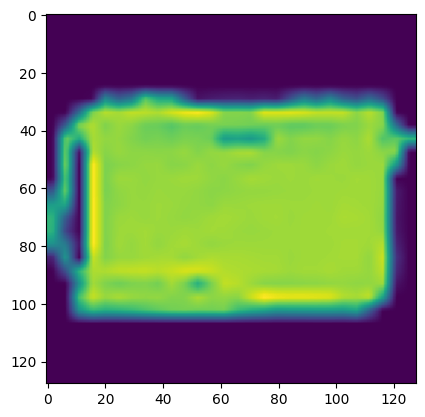

In [6]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [34]:
def DataAugmentation(size, rotarion, path=""):
  '''
    Função construída para realizar o processo de
  Data Augmentation de forma automatizada. Aqui será
  realizado a transformação e prepraração dos dados.
  de modo que já seja possível realizar o treinamento.
  '''

  # Redefinindo transformação dos dados:
  train_transforms = transforms.Compose([
      transforms.RandomHorizontalFlip(),   # Flip horizontal aleatório
      transforms.RandomRotation(rotarion), # Rotação aleatória
      transforms.Resize(size),      # Redimensionar
      transforms.ToTensor()         # Converter para tensor
  ])

  # Acessando os dados:
  try:
    dataset_train = ImageFolder( # Busca os dados localmente
        path,
        transform=train_transforms # Realizando transformação:
    )
  except:
    dataset_train = FashionMNIST( # Alternativa, caso não se tenha dados localmente
      root="data",
      train=True,
      download=True,
      transform=train_transforms # Realizando transformação:
      )
  # Instanciando conjunto de dados:
  dataloader_train = DataLoader(
      dataset_train,
      shuffle=True,
      batch_size=1,
  )

  image, label = next(iter(dataloader_train))
  print(image.shape)

  # Avaliando Transformações nos dados:
  print("Antes do squeeze:", image.shape)  # Exibe o formato original
  image = image.squeeze()  # Remove dimensões com tamanho 1

  print("Após o squeeze:", image.shape)  # Exibe o formato após o squeeze

  # Certifique-se de que image tem 3 dimensões antes de permutar
  if image.ndim == 3:
      image = image.permute(1, 2, 0)  # Apenas necessário para imagens RGB
      print("Após o permute:", image.shape)
  else:
      print("Imagem em escala de cinza, sem necessidade de permutar.")



  # Visualizando:
  plt.imshow(image)
  plt.show()

  return dataloader_train

torch.Size([1, 1, 60, 150])
Antes do squeeze: torch.Size([1, 1, 60, 150])
Após o squeeze: torch.Size([60, 150])
Imagem em escala de cinza, sem necessidade de permutar.


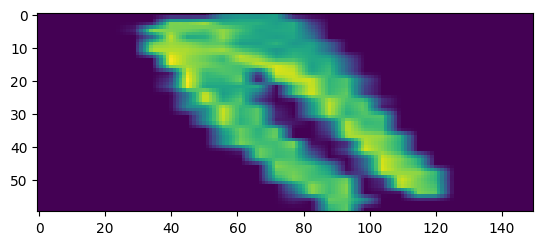

In [38]:
_ = DataAugmentation((60,150),90)